<a href="https://colab.research.google.com/github/JunukCha/SSPSE/blob/main/%EA%B8%B0%EA%B0%81_%EC%83%98%ED%94%8C%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

**정규분포**

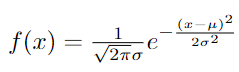

In [2]:
mu = 0
sigma = 1.0
x = np.linspace(-3, 3, 10000)
y = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
y_cdf = 0.5 * (1 + special.erf((x - mu)/(np.sqrt(2 * sigma**2))))

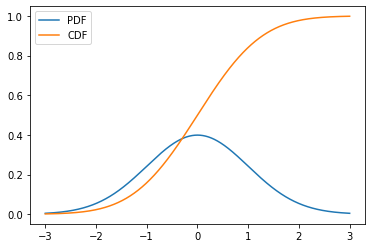

In [3]:
plt.plot(x, y, label="PDF")
plt.plot(x, y_cdf, label="CDF")
plt.legend()
plt.show()

타겟 분포

f(x) = 0.3e^(-0.2x^2)+0.7e^(-0.2(x-10)^2)

In [22]:
x = np.linspace(-10, 20, 10000)
f_x = 0.3*(np.exp(-0.2*x**2)) + 0.7*(np.exp(-0.2*(x-10)**2))

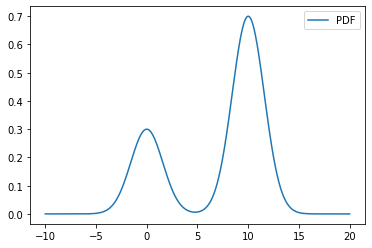

In [23]:
plt.plot(x, f_x, label="PDF")
plt.legend()
plt.show()

제안 분포

g(x) = 1/24 if -7 ≤ x ≤ 17

g(x) = 0 otherwise

In [24]:
g_x = lambda x: (x > -7 and x < 17)/24

In [25]:
proposal = list(map(g_x, x))

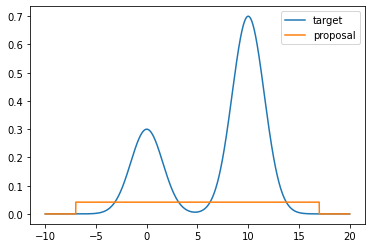

In [26]:
plt.plot(x, f_x, label="target")
plt.plot(x, proposal, label="proposal")
plt.legend()
plt.show()

Mg(x) 

여기서 M은 0.7*24

In [29]:
Mg_x = lambda x: (x > -7 and x < 17)/24 * (0.7*24)

In [30]:
M_proposal = list(map(Mg_x, x))

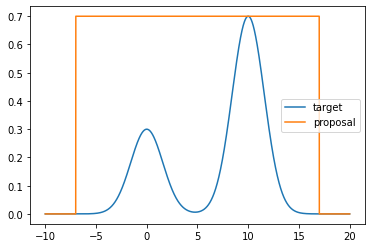

In [31]:
plt.plot(x, f_x, label="target")
plt.plot(x, M_proposal, label="proposal")
plt.legend()
plt.show()

# Sampling

### 2000개 샘플링

### 제안 함수는 1/30으로 설정 M은 0.7*30이 됨.

In [32]:
Mg_x = lambda x: (x >= -10 and x <= 20)/30 * (0.7*30)

In [33]:
y = lambda x :0.3*(np.exp(-0.2*x**2)) + 0.7*(np.exp(-0.2*(x-10)**2))

In [35]:
f_alpha = lambda x: y(x)/Mg_x(x)

In [36]:
n = 2000

x_0 = np.random.uniform(size=n)*30-10
alpha = list(map(f_alpha, x_0))
coins = np.random.uniform(size=n)

In [16]:
accept = np.where(h >= coins)
reject = np.where(h < coins)

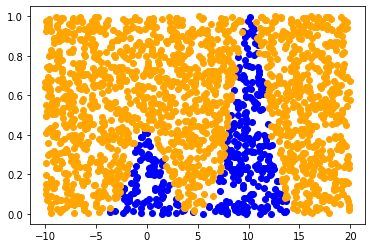

In [17]:
plt.scatter(x_0[accept], coins[accept], c="b", label="accept")
plt.scatter(x_0[reject], coins[reject], c="orange", label="reject")
plt.show()

# 히스토그램

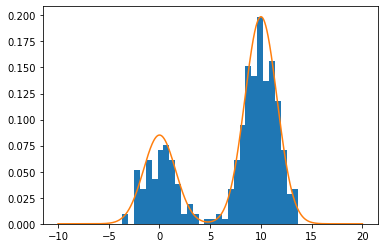

In [18]:
h = plt.hist(x_0[accept], bins=30, density=True)
y_xx = list(map(y, x))
plt.plot(x, y_xx/max(y_xx)*np.max(h[0]))
plt.show()

### 예시
x_0의 값이 0일 경우, accpet할지 reject할지

In [37]:
Mg_x(0)

0.7

In [38]:
y(0)

0.30000000144280753

In [39]:
y(0)/Mg_x(0)

0.4285714306325822

만약 0~1 사이의 랜덤한 값이 0.4286보다 작으면 accpet 크면 reject 합니다.